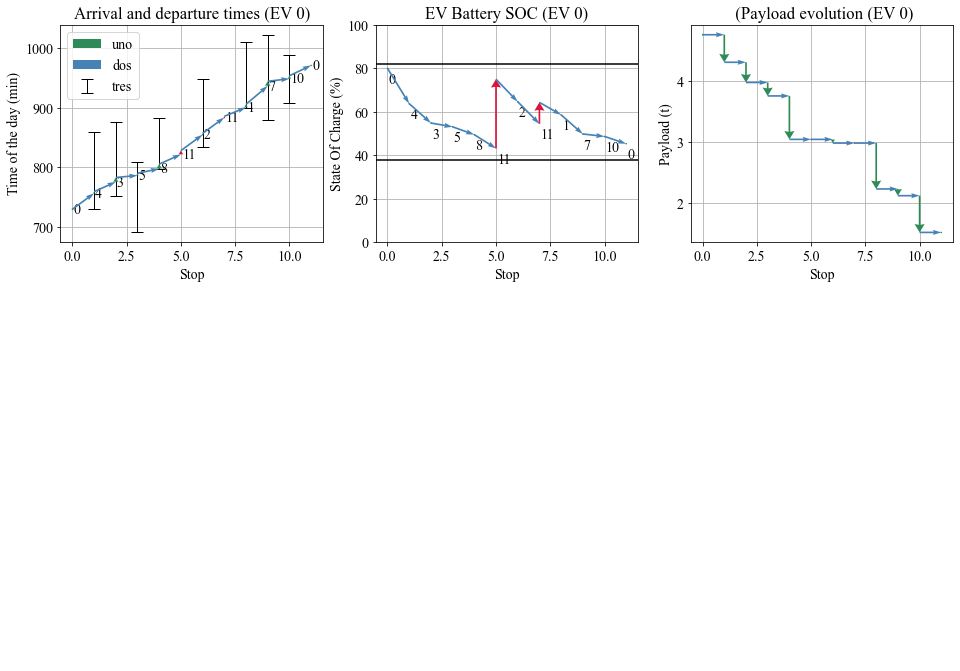

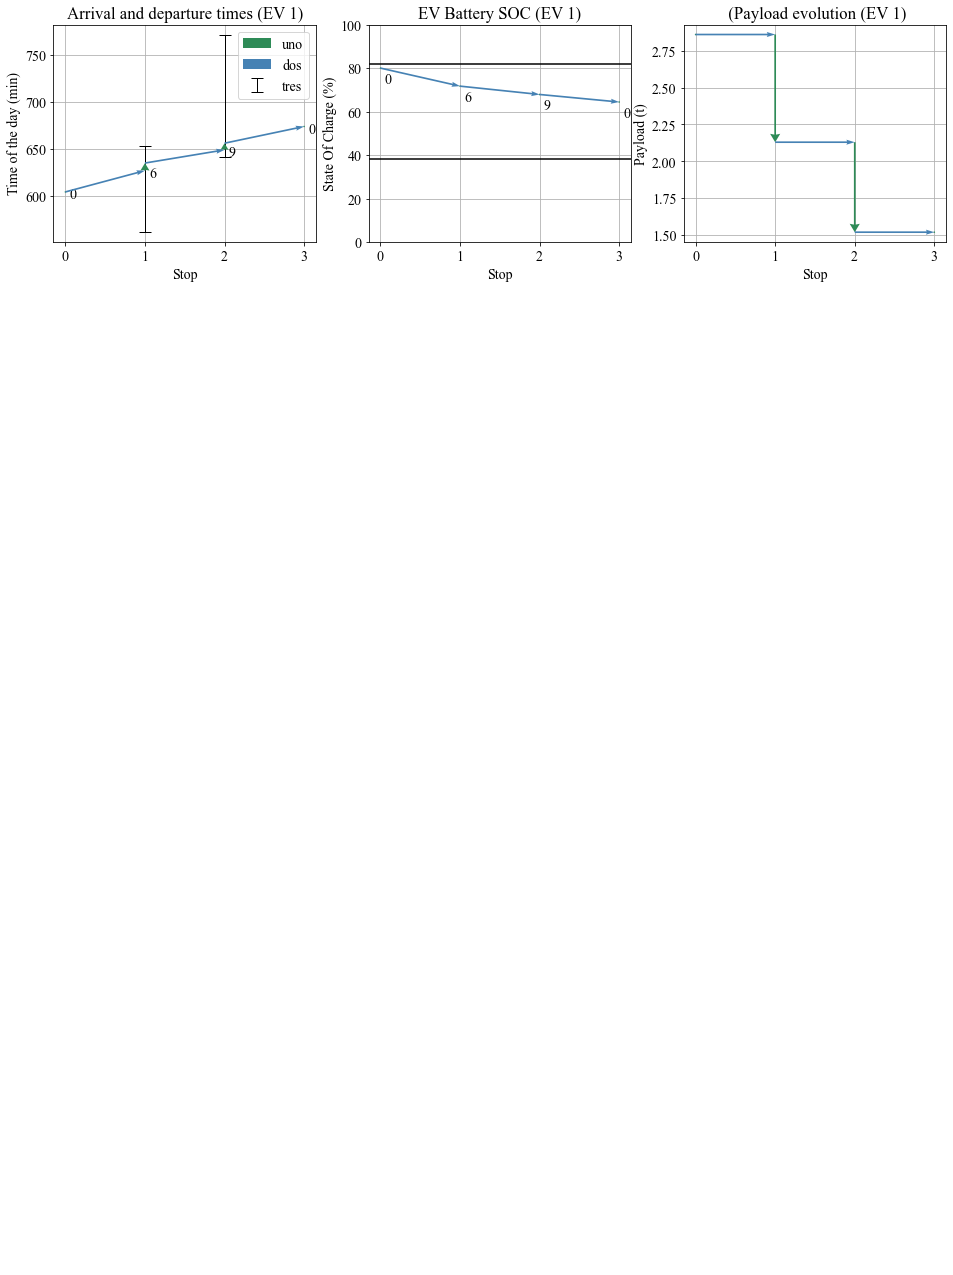

In [1]:
import sys

import pandas as pd

sys.path.append('..')
from models.Fleet import  from_xml
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = '14'

instance_folder = '../data/GA_implementation_xml/10C_2CS_1D_2EV_3CAP'
opt_res_folder = f'{instance_folder}/18-05-2020_15-06-13_FEASIBLE_ASSIGNED'

fleet = from_xml(f'{instance_folder}/10C_2CS_1D_2EV_3CAP_already_assigned.xml', assign_customers=False)

#
fleet_size = 2

routes = {}
for i in range(fleet_size):
    ev_file = f'{opt_res_folder}/EV{i}_operation.csv'
    df = pd.read_csv(ev_file)
    Sk = tuple(df['Sk'])
    Lk = tuple(df['Lk'])
    x1_0 = df['x1_reaching'].iloc[0]
    x2_0 = df['x2_reaching'].iloc[0]
    x3_0 = df['x3_reaching'].iloc[0]
    routes[i] = ((Sk, Lk), x1_0, x2_0, x3_0)

fleet.set_routes_of_vehicles(routes)
fleet.create_optimization_vector()


plots = fleet.plot_operation_pyplot(label_offset=(.05, -7), fig_size=(16,4))

In [2]:
from bokeh.io import output_notebook
output_notebook()
#fleet.plot_operation()

Loading BokehJS ...

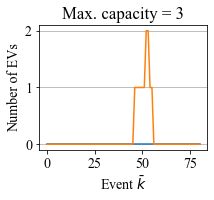

In [3]:
import matplotlib.pyplot as plt

folder = '../data/GA_implementation_xml/35C_2CS_1D_3EV_4CAP/'
folder_opt = '24-05-2020_02-43-13_FEASIBLE_ASSIGNATION/'
file_path = folder + folder_opt + 'nodes_occupation.csv'
fig_path = folder + folder_opt + 'occupation2.pdf'
df = pd.read_csv(file_path)
plot = df[['36', '37']].plot(yticks=[0,1,2], figsize=(3.2,3), legend=False)
plt.grid(axis='y')
plt.xlabel(r'Event $\bar{k}$')
plt.ylabel(r'Number of EVs')
plt.title('Max. capacity = 3')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(fig_path)

(<Figure size 432x288 with 1 Axes>,
 <networkx.classes.digraph.DiGraph at 0x21a0a3c0a08>)

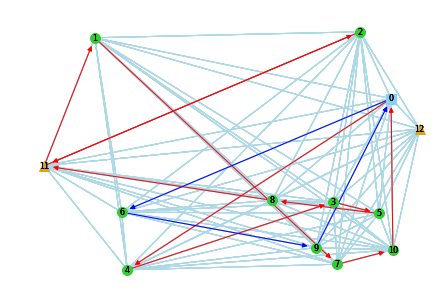

In [4]:
fleet.draw_operation(color_route=('red', 'blue', 'green'), edge_color='lightblue', node_size=100, font_size=8)